In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

PATH_COLLECTED_DATA = './computed/collected_data.csv'
PATH_COLLECTED_DATA_REDUCED = './computed/collected_data_reduced_features.csv'

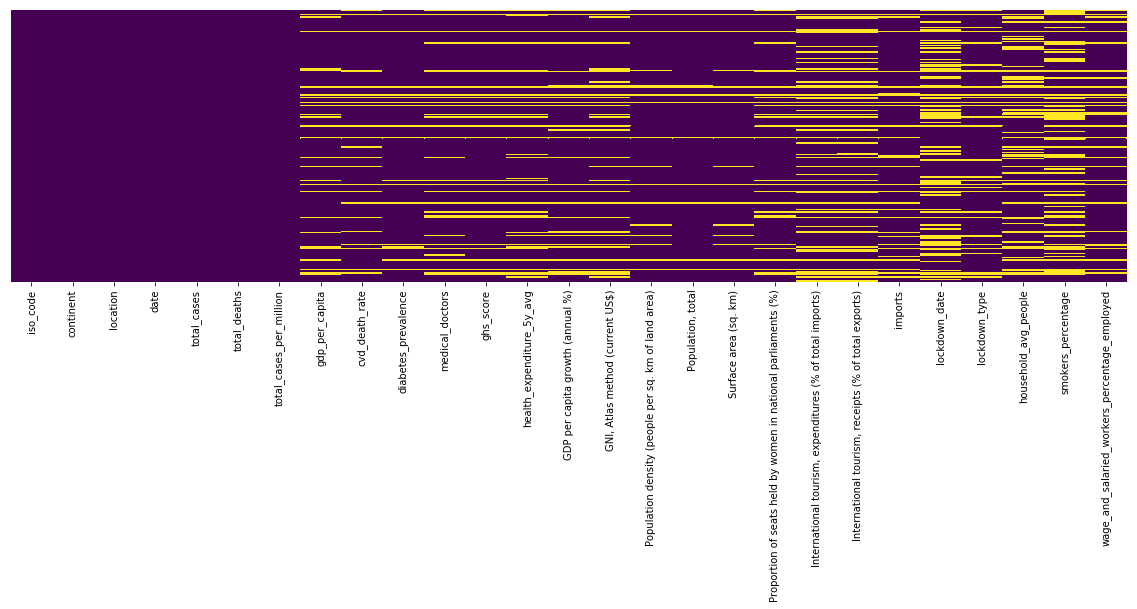

In [2]:
df_complete = pd.read_csv(PATH_COLLECTED_DATA)
df = pd.read_csv(PATH_COLLECTED_DATA_REDUCED)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

Because it might be easier to predict relative number of deaths, we create the column `total_deaths_per_million` based on absolute number of deaths and population.

In [3]:
total_deaths_per_million = 10**(-6) * df["total_deaths"] / df["Population, total"]
df.insert(loc=0, column='total_deaths_per_million', value=total_deaths_per_million)

In [4]:
df_deaths = df.loc[:, ["total_deaths", "total_deaths_per_million", "gdp_per_capita", "cvd_death_rate",
                       "health_expenditure_5y_avg", "smokers_percentage"]]

(132, 6)


,total_deaths,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,smokers_percentage
total_deaths,1,0.41,0.18,-0.19,0.38,0.014
total_deaths_per_million,0.41,1,0.38,-0.37,0.38,0.13
gdp_per_capita,0.18,0.38,1,-0.47,0.21,0.13
cvd_death_rate,-0.19,-0.37,-0.47,1,-0.27,0.21
health_expenditure_5y_avg,0.38,0.38,0.21,-0.27,1,0.19
smokers_percentage,0.014,0.13,0.13,0.21,0.19,1


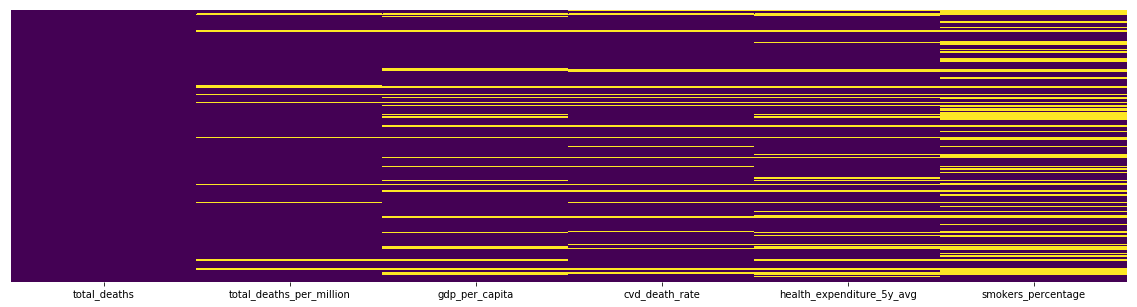

In [5]:
print(df_deaths.dropna().shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df_deaths.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
corr = df_deaths.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Obviously there we don't have much datasets for smoker percantage. We want to predict this number based on features with high correlation (we dropped before).

(209, 4)


,aged_70_older,medical_doctors,wage_and_salaried_workers_percentage_employed,smokers_percentage
aged_70_older,1,0.76,0.63,0.49
medical_doctors,0.76,1,0.68,0.48
wage_and_salaried_workers_percentage_employed,0.63,0.68,1,0.38
smokers_percentage,0.49,0.48,0.38,1


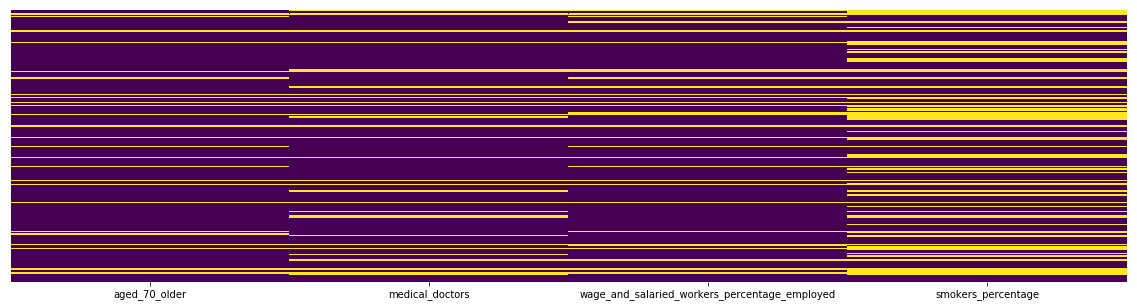

In [6]:
df_smokers = df_complete.loc[:, ["aged_70_older", "medical_doctors"]]
df_smokers["wage_and_salaried_workers_percentage_employed"] = df["wage_and_salaried_workers_percentage_employed"]
df_smokers["smokers_percentage"] = df["smokers_percentage"]

print(df_smokers.shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df_smokers.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
corr = df_smokers.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

(134, 4)
[23.30724111 34.57790682 17.11135509 61.86329787 36.30166344 32.28413803
 18.37928539 31.62710717 29.57912823 26.21145402 60.09661066 19.70592316
 29.33870053 22.5635243  54.63182388 61.99041457 47.34568465 73.38170049
 78.49638069 81.36316687 59.95016285 21.08827056 70.1177006  42.64518663
 52.08010699 46.14337065 42.71690189 19.97189703 47.94021782 65.08336528
 17.70512081 54.20183042 70.65222663 67.74590443 58.68277662]
test:      smokers_percentage
0               29.3705
1               19.4810
2               22.0075
3               27.0530
4               14.7675
5               29.6625
6               21.6110
7               28.2815
8                6.5085
9               12.8615
10              23.0685
11              37.3215
12              21.8590
13              11.8365
14              39.0375
15              28.4780
16              14.0390
17               8.2630
18              16.5945
19              20.1935
20              14.3230
21              25.7815
22    

,aged_70_older,medical_doctors,wage_and_salaried_workers_percentage_employed,smokers_percentage
aged_70_older,1,0.76,0.63,0.1
medical_doctors,0.76,1,0.68,0.14
wage_and_salaried_workers_percentage_employed,0.63,0.68,1,0.26
smokers_percentage,0.1,0.14,0.26,1


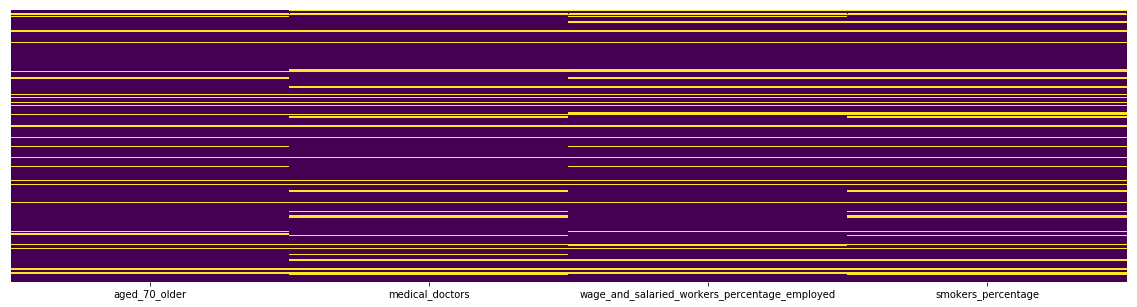

In [7]:
df_smokers_value_exists = df_smokers.dropna()
print(df_smokers_value_exists.shape)

X = df_smokers_value_exists.drop("smokers_percentage", axis=1)
y = df_smokers_value_exists["smokers_percentage"]

regressor = LinearRegression()
regressor.fit(X, y)

X_pred = pd.DataFrame(data={}, columns=['wage_and_salaried_workers_percentage_employed','aged_70_older','medical_doctors'])
X_test = pd.DataFrame(data={}, columns=['wage_and_salaried_workers_percentage_employed','aged_70_older','medical_doctors'])
y_test = pd.DataFrame(data={}, columns=['smokers_percentage'])
i, j = 0, 0
for index, row in df_smokers.iterrows():
    if (math.isnan(row["smokers_percentage"]) and not math.isnan(row["aged_70_older"])
        and not math.isnan(row["medical_doctors"]) and not math.isnan(row["wage_and_salaried_workers_percentage_employed"])):
        X_pred.loc[i] = [row["wage_and_salaried_workers_percentage_employed"], row["aged_70_older"], row["medical_doctors"]]
        i+=1
    elif (not math.isnan(row["smokers_percentage"]) and not math.isnan(row["aged_70_older"])
        and not math.isnan(row["medical_doctors"]) and not math.isnan(row["wage_and_salaried_workers_percentage_employed"])):
        X_test.loc[j] = [row["wage_and_salaried_workers_percentage_employed"], row["aged_70_older"], row["medical_doctors"]]
        y_test.loc[j] = [row["smokers_percentage"]]
        j+=1

y_pred = regressor.predict(X_pred)
y_test_pred = regressor.predict(X_test)
print(y_pred)

print("test:", y_test, y_test_pred)

i=0
for index, row in df_smokers.iterrows():
    if (math.isnan(row["smokers_percentage"]) and not math.isnan(row["aged_70_older"])
        and not math.isnan(row["medical_doctors"]) and not math.isnan(row["wage_and_salaried_workers_percentage_employed"])):
        row["smokers_percentage"] = y_pred[i]
        i+=1

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df_smokers.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
corr = df_smokers.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [8]:
#for i in range(y_test.shape[0]):
#    print(i, y_test.loc[i, "smokers_percentage"], y_test_pred[i])
y_test_compare = y_test.copy()
y_test_compare["pred"] = y_test_pred
corr = y_test_compare.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,smokers_percentage,pred
smokers_percentage,1,0.42
pred,0.42,1


## TODO: doesn't work for smokers_percentage

(164, 6)


,total_deaths,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,smokers_percentage
total_deaths,1,0.41,0.18,-0.19,0.38,-0.055
total_deaths_per_million,0.41,1,0.38,-0.37,0.38,-0.0079
gdp_per_capita,0.18,0.38,1,-0.47,0.21,-0.047
cvd_death_rate,-0.19,-0.37,-0.47,1,-0.27,0.11
health_expenditure_5y_avg,0.38,0.38,0.21,-0.27,1,-0.013
smokers_percentage,-0.055,-0.0079,-0.047,0.11,-0.013,1


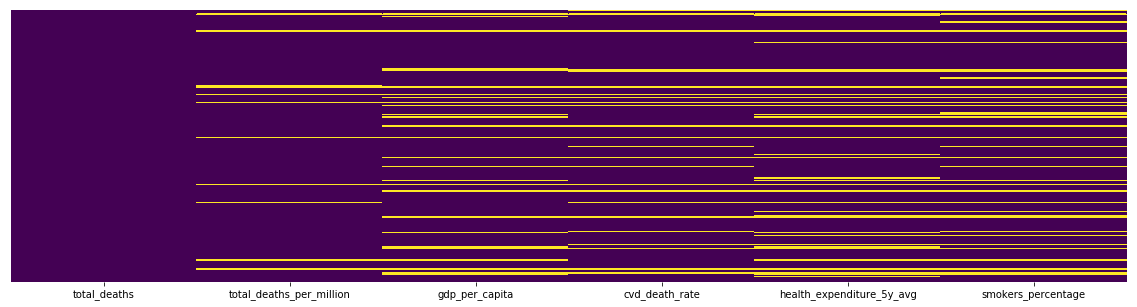

In [9]:
df_deaths["smokers_percentage"] = df_smokers["smokers_percentage"]

print(df_deaths.dropna().shape)
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(data = df_deaths.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
corr = df_deaths.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [10]:
df_deaths["iso_code"] = df_complete["iso_code"]
df_deaths["location"] = df_complete["location"]
df_deaths.dropna().to_csv('./computed/deaths.csv', sep=',', encoding='utf-8', index=False)